# Question n°1

Quels joueurs et quelles joueuses ont gagné au moins 10 titres du Grand Chelem ? Indiquez le nombre de titres pour ces personnes.

## Python brut

In [168]:
for name in list(locals().keys()):
    del locals()[name]

In [169]:
# Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import psutil

Initialisation du temps

In [170]:
notebook_start_time = time.time()
print("Début de l'exécution du notebook...")

Début de l'exécution du notebook...


### Récupération des données

In [171]:
joueurs_hommes = []

liste_fichier = os.listdir('donnees_tennis\ATP')

for fichier in liste_fichier:
    if fichier.startswith('atp_matches_19') or fichier.startswith('atp_matches_20'):

        chemin = os.path.join("donnees_tennis","ATP",fichier)

        with open(chemin, 'r') as fd:
            for ligne in fd:
                s = ligne.strip('\n')
                l = s.split(',')

                # Selection des variables d'intérêt
                # l[4] = type de tournoi -> G pour grans Chelem
                # l[25] = round -> F pour finale
                # l[10] = nom du joueur
                if l[4] == 'G' and l[25] == 'F':
                    liste = l[10]
                    joueurs_hommes.append(liste)

In [172]:
joueurs_femmes = []

liste_fichier = os.listdir('donnees_tennis\WTA')

for fichier in liste_fichier:

    if fichier.startswith('wta_matches_19') or fichier.startswith('wta_matches_20'):

        chemin = os.path.join("donnees_tennis","WTA",fichier)

        with open(chemin, 'r') as fd:
            for ligne in fd:
                s = ligne.strip('\n')
                l = s.split(',')
                if l[4] == 'G' and l[25] == 'F':
                    liste = l[10]
                    joueurs_femmes.append(liste)

In [173]:
time_telechargement = time.time()

### Traitement

Création d'un dictionnaire pour compter le nombre de titres par joueur/joueuse.

In [174]:
resultat_bilan = {joueurs_hommes[0]: 1}
for joueur in joueurs_hommes:
    if joueur in resultat_bilan.keys():
        resultat_bilan[joueur]+=1
    else:
        resultat_bilan[joueur]=1

for joueur in joueurs_femmes:
    if joueur in resultat_bilan.keys():
        resultat_bilan[joueur]+=1
    else:
        resultat_bilan[joueur]=1

Selection des joueurs et joueuses ayant au moins 10 titres.

In [175]:
resultat_bilan2 = {}
for clef in resultat_bilan.keys():
    if resultat_bilan[clef]>=10:
        resultat_bilan2[clef]=resultat_bilan[clef]


In [176]:
time_traitement = time.time()

### Affichage des résultats

In [177]:
display(resultat_bilan2)

{'Bjorn Borg': 11,
 'Pete Sampras': 14,
 'Roger Federer': 20,
 'Rafael Nadal': 22,
 'Novak Djokovic': 24,
 'Margaret Court': 11,
 'Chris Evert': 18,
 'Martina Navratilova': 18,
 'Steffi Graf': 22,
 'Serena Williams': 23}

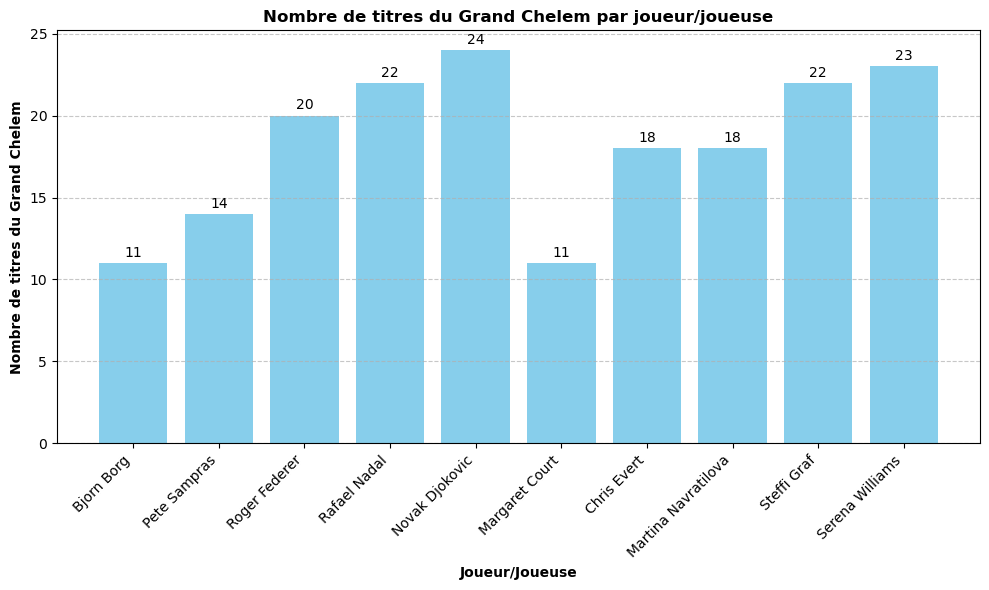

In [178]:
# Séparer les noms et les valeurs
names = list(resultat_bilan2.keys())
values = list(resultat_bilan2.values())

# Créer le diagramme en barres
plt.figure(figsize=(10, 6))
bars = plt.bar(names, values, color='skyblue')

# Ajouter les valeurs au-dessus de chaque barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom')

# Ajouter des labels et un titre
plt.xlabel('Joueur/Joueuse', fontweight='bold')
plt.ylabel('Nombre de titres du Grand Chelem', fontweight='bold')
plt.title('Nombre de titres du Grand Chelem par joueur/joueuse', fontweight='bold')

# Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Ajouter une grille pour faciliter la lecture (optionnel)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajuster la disposition pour éviter que les labels ne se chevauchent
plt.tight_layout()

# Pour enregistrer le diagramme dans un fichier (optionnel)
plt.savefig('Graphiques/grand_chelem_titles_python.png')

# Afficher le diagramme
plt.show()


In [179]:
notebook_end_time = time.time()
total_execution_time = notebook_end_time - notebook_start_time
print(f"Fin de l'exécution de la partie Pandas DataFrame.")
print(f"Temps d'exécution total du notebook : {total_execution_time:.2f} secondes")
print(f"Temps de téléchargement des données : {time_telechargement - notebook_start_time:.2f} secondes")
print(f"Temps de traitement des données : {time_traitement - time_telechargement:.2f} secondes")
print(f"Temps d'affichage des graphiques : {notebook_end_time - time_traitement:.2f} secondes")

Fin de l'exécution de la partie Pandas DataFrame.
Temps d'exécution total du notebook : 1.35 secondes
Temps de téléchargement des données : 0.88 secondes
Temps de traitement des données : 0.04 secondes
Temps d'affichage des graphiques : 0.43 secondes


In [180]:
processus = psutil.Process(os.getpid())
info_memoire = processus.memory_info()
rss_mo = info_memoire.rss / (1024 * 1024)  # Resident Set Size (RAM réellement utilisée)
vms_mo = info_memoire.vms / (1024 * 1024)  # Virtual Memory Size (Taille de la mémoire virtuelle)
print(f"Taille de l'ensemble résident (RSS) : {rss_mo:.2f} Mo")
print(f"Taille de la mémoire virtuelle (VMS) : {vms_mo:.2f} Mo")

Taille de l'ensemble résident (RSS) : 325.50 Mo
Taille de la mémoire virtuelle (VMS) : 338.12 Mo


## Pandas

In [181]:
for name in list(locals().keys()):
    del locals()[name]

In [182]:
# Librairies
import time
import psutil
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

Initialisation du temps

In [183]:
notebook_start_time = time.time()
print("Début de l'exécution du notebook...")

Début de l'exécution du notebook...


### Récupération des données

In [184]:
matchs_hommes = pd.DataFrame()

liste_fichier = os.listdir('donnees_tennis\ATP')
for fichier in liste_fichier:
    if fichier.startswith('atp_matches_19') or fichier.startswith('atp_matches_20'):
        data_annee = pd.read_csv('donnees_tennis\ATP\\' + fichier)
        # Selection des finales
        data_annee = data_annee[data_annee["round"]=="F"]
        # Selection des matchs de grand Chelem
        data_annee = data_annee[data_annee["tourney_level"]=="G"]
        # Selection des variables d'intéret
        data_annee = data_annee[["winner_name"]] # Double crochet pour garder le nom de la colonne

        matchs_hommes = pd.concat([matchs_hommes, data_annee], axis=0)

In [185]:
matchs_femmes = pd.DataFrame()

liste_fichier = os.listdir('donnees_tennis\WTA')
for fichier in liste_fichier:
    if fichier.startswith('wta_matches_19') or fichier.startswith('wta_matches_20'):
        data_annee = pd.read_csv('donnees_tennis\WTA\\' + fichier)
        # Selection des finales
        data_annee = data_annee[data_annee["round"]=="F"]
        # Selection des matchs de grand Chelem
        data_annee = data_annee[data_annee["tourney_level"]=="G"]
        # Selection des variables d'intéret
        data_annee = data_annee[["winner_name"]] # Double crochet pour garder le nom de la colonne

        matchs_femmes = pd.concat([matchs_femmes, data_annee], axis=0)

In [186]:
time_telechargement = time.time()

### Traitement

Récupération des tournois du Grand Chelem et de la finale. Selection des variables d'intéret

In [187]:
# Traitement des matchs hommes
resultat_hommes_counts = matchs_hommes["winner_name"].value_counts().reset_index()
plus_10_victoires_hommes = resultat_hommes_counts.rename(columns={'winner_name': 'Joueur', 'count': 'Nombre tournois'})
plus_10_victoires_hommes = plus_10_victoires_hommes[plus_10_victoires_hommes['Nombre tournois'] >= 10]

# Traitement des matchs femmes
resultat_femmes_counts = matchs_femmes["winner_name"].value_counts().reset_index()
plus_10_victoires_femmes = resultat_femmes_counts.rename(columns={'winner_name': 'Joueur', 'count': 'Nombre tournois'})
plus_10_victoires_femmes = plus_10_victoires_femmes[plus_10_victoires_femmes['Nombre tournois'] >= 10]

# Concaténation des résultats hommes et femmes
resultat_bilan = pd.concat([plus_10_victoires_hommes, plus_10_victoires_femmes], axis=0)


In [188]:
time_traitement = time.time()

### Affichage des résultats

In [189]:
display(resultat_bilan)


,Joueur,Nombre tournois
0,Novak Djokovic,24
1,Rafael Nadal,22
2,Roger Federer,20
3,Pete Sampras,14
4,Bjorn Borg,11
0,Serena Williams,23
1,Steffi Graf,22
2,Chris Evert,18
3,Martina Navratilova,18
4,Margaret Court,11


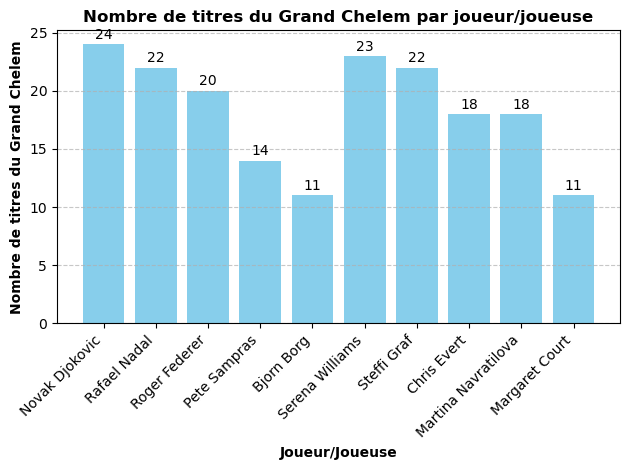

In [190]:
bars = plt.bar(resultat_bilan['Joueur'], resultat_bilan['Nombre tournois'], color='skyblue')

# Ajouter les valeurs au-dessus de chaque barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, int(yval), ha='center', va='bottom')

# Ajouter des labels et un titre
plt.xlabel('Joueur/Joueuse', fontweight='bold')
plt.ylabel('Nombre de titres du Grand Chelem', fontweight='bold')
plt.title('Nombre de titres du Grand Chelem par joueur/joueuse', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Enregistrer le graphique
plt.savefig('Graphiques/grand_chelem_titles_pandas.png')

# Afficher le graphique
plt.show()

In [191]:
notebook_end_time = time.time()
total_execution_time = notebook_end_time - notebook_start_time
print(f"Fin de l'exécution de la partie Pandas DataFrame.")
print(f"Temps d'exécution total du notebook : {total_execution_time:.2f} secondes")
print(f"Temps de téléchargement des données : {time_telechargement - notebook_start_time:.2f} secondes")
print(f"Temps de traitement des données : {time_traitement - time_telechargement:.2f} secondes")
print(f"Temps d'affichage des graphiques : {notebook_end_time - time_traitement:.2f} secondes")

Fin de l'exécution de la partie Pandas DataFrame.
Temps d'exécution total du notebook : 2.16 secondes
Temps de téléchargement des données : 1.72 secondes
Temps de traitement des données : 0.03 secondes
Temps d'affichage des graphiques : 0.40 secondes


In [192]:
processus = psutil.Process(os.getpid())
info_memoire = processus.memory_info()
rss_mo = info_memoire.rss / (1024 * 1024)  # Resident Set Size (RAM réellement utilisée)
vms_mo = info_memoire.vms / (1024 * 1024)  # Virtual Memory Size (Taille de la mémoire virtuelle)
print(f"Taille de l'ensemble résident (RSS) : {rss_mo:.2f} Mo")
print(f"Taille de la mémoire virtuelle (VMS) : {vms_mo:.2f} Mo")

Taille de l'ensemble résident (RSS) : 326.60 Mo
Taille de la mémoire virtuelle (VMS) : 339.36 Mo
